In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
print("pandas version:",pd. __version__)
print("numpy version:",np.__version__) 
print("sea born version:",sns.__version__)

pandas version: 1.3.4
numpy version: 1.20.3
sea born version: 0.11.2


In [3]:
df = pd.read_csv(r"C:\Users\vinot\Downloads\loan\loan.csv", low_memory=False)

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


<h1> <span style="font-family:Times New Roman"> <span style="color:Green"> DATA CLEANING </span> </span> </h1>

<h2> <span style="font-family:Times New Roman"> <span style="color:Brown"> FIXING ROWS AND COLUMNS </span> </span> </h2>

>### **Checking the `NaN` count column wise**

In [5]:
pd.set_option("max_rows", None)
df.isna().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


>### Dropping all the columns having `NaN` in all of the rows

In [6]:
df.dropna(axis=1, how="all", inplace=True)

In [7]:
df.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

<h2> <span style="font-family:Times New Roman"> <span style="color:Brown"> MISSING VALUES </span> </span> </h2>

### `Dropping the below columns as majority of rows are NaN`
>- mths_since_last_delinq
>- mths_since_last_record
>- next_pymnt_d
>- desc
>- emp_title

In [8]:
df.drop(["mths_since_last_delinq", "mths_since_last_record", "next_pymnt_d", "desc", "emp_title"], axis=1, inplace=True)

In [9]:
pd.set_option("max_rows", 10)
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

<h2> <span style="font-family:Times New Roman"> <span style="color:Brown"> INVALID VALUES </span> </span> </h2>

### `Verifying these records if it makes any sense`
>- pymnt_plan
>- initial_list_status
>- collections_12_mths_ex_med
>- policy_code            
>- application_type           
>- acc_now_delinq         
>- chargeoff_within_12_mths   
>- delinq_amnt 
>- tax_liens 

<h3 style = "color : darkblue"> pymnt_plan </h3>

In [10]:
df["pymnt_plan"].value_counts()

n    39717
Name: pymnt_plan, dtype: int64

<h3 style = "color : darkblue"> initial_list_status </h3>

In [11]:
df["initial_list_status"].value_counts()

f    39717
Name: initial_list_status, dtype: int64

<h3 style = "color : darkblue"> collections_12_mths_ex_med </h3>

In [12]:
df["collections_12_mths_ex_med"].value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

<h3 style = "color : darkblue"> policy_code </h3>

In [13]:
df["policy_code"].value_counts()

1    39717
Name: policy_code, dtype: int64

<h3 style = "color : darkblue"> application_type </h3>

In [14]:
df["application_type"].value_counts()

INDIVIDUAL    39717
Name: application_type, dtype: int64

<h3 style = "color : darkblue"> acc_now_delinq </h3>

In [15]:
df["acc_now_delinq"].value_counts()

0    39717
Name: acc_now_delinq, dtype: int64

<h3 style = "color : darkblue"> chargeoff_within_12_mths </h3>

In [16]:
df["chargeoff_within_12_mths"].value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

<h3 style = "color : darkblue"> delinq_amnt </h3>

In [17]:
df["delinq_amnt"].value_counts()

0    39717
Name: delinq_amnt, dtype: int64

<h3 style = "color : darkblue"> tax_liens </h3>

In [18]:
df["tax_liens"].value_counts()

0.0    39678
Name: tax_liens, dtype: int64

### `Dropping all the above records as it makes no sense`

In [19]:
df.drop(df.loc[:, "collections_12_mths_ex_med": "delinq_amnt"].columns, axis=1, inplace=True)
df.drop(["pymnt_plan", "initial_list_status", "tax_liens"], axis=1, inplace=True)

In [20]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

<h2> <span style="font-family:Times New Roman"> <span style="color:Brown"> FILTERING DATA </span> </span> </h2>

### `By reading the metadate, These below columns seems not needed`
>- id   
>- member_id 
>- url 
>- title 
>- zip_code 
>- earliest_cr_line

<h3 style = "color : darkblue"> id </h3>

In [21]:
df["id"].value_counts()

1077501    1
568534     1
568659     1
567165     1
568531     1
          ..
785667     1
785659     1
785630     1
785626     1
87023      1
Name: id, Length: 39717, dtype: int64

<h3 style = "color : darkblue"> member_id </h3>

In [22]:
df["member_id"].value_counts()

1296599    1
731393     1
731544     1
729629     1
731390     1
          ..
989001     1
988993     1
988959     1
988954     1
86999      1
Name: member_id, Length: 39717, dtype: int64

<h3 style = "color : darkblue"> url </h3>

In [23]:
df["url"].value_counts()

https://lendingclub.com/browse/loanDetail.action?loan_id=1077501    1
https://lendingclub.com/browse/loanDetail.action?loan_id=568534     1
https://lendingclub.com/browse/loanDetail.action?loan_id=568659     1
https://lendingclub.com/browse/loanDetail.action?loan_id=567165     1
https://lendingclub.com/browse/loanDetail.action?loan_id=568531     1
                                                                   ..
https://lendingclub.com/browse/loanDetail.action?loan_id=785667     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785659     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785630     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785626     1
https://lendingclub.com/browse/loanDetail.action?loan_id=87023      1
Name: url, Length: 39717, dtype: int64

<h3 style = "color : darkblue"> title </h3>

In [24]:
df["title"].value_counts()

Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: title, Length: 19615, dtype: int64

<h3 style = "color : darkblue"> zip_code </h3>

In [25]:
df["zip_code"].value_counts()

100xx    597
945xx    545
112xx    516
606xx    503
070xx    473
        ... 
381xx      1
378xx      1
739xx      1
396xx      1
469xx      1
Name: zip_code, Length: 823, dtype: int64

<h3 style = "color : darkblue"> earliest_cr_line </h3>

In [26]:
df["earliest_cr_line"].value_counts()

Nov-98    370
Oct-99    366
Dec-98    348
Oct-00    346
Dec-97    329
         ... 
Feb-66      1
Dec-61      1
Oct-54      1
Jun-72      1
Oct-74      1
Name: earliest_cr_line, Length: 526, dtype: int64

### `Dropping all the above records as we don't need these for our analysis`

In [27]:
df.drop(["id", "member_id", "url"], axis=1, inplace=True)
df.drop(["title", "zip_code", "earliest_cr_line"], axis=1, inplace=True)

<h2> <span style="font-family:Times New Roman"> <span style="color:Brown"> DERIVED MATRICS </span> </span> </h2>

<h3 style = "color : darkblue"> issue_d </h3>

In [28]:
df["issue_d"].dtype

dtype('O')

In [29]:
df["issue_d"].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07'], dtype=object)

In [30]:
df["issued_month"] = df["issue_d"].apply(lambda x: x.split('-')[0])
df["issued_year"] = df["issue_d"].apply(lambda x: int(x.split('-')[1]))
#df.drop("issue_d", axis=1, inplace=True)

<h2> <span style="font-family:Times New Roman"> <span style="color:Brown"> STANDARDISING VALUES </span> </span> </h2>

In [31]:
pd.set_option("max_rows", None)
df.dtypes

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp     

<h3 style = "color : darkblue"> int_rate </h3>

In [32]:
df["int_rate"].dtype

dtype('O')

In [33]:
df["int_rate"].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [34]:
df["int_rate"] = df["int_rate"].apply(lambda x: float(x.replace("%", ""))) 

In [35]:
df["int_rate"].dtype

dtype('float64')

<h3 style = "color : darkblue"> emp_length </h3>

In [36]:
df["emp_length"].head()

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
Name: emp_length, dtype: object

In [37]:
df["emp_length"].isna().sum()

1075

In [38]:
df["emp_length"] = df["emp_length"].fillna(0)

In [39]:
df["emp_length"].isna().sum()

0

In [40]:
df["emp_length"] = df["emp_length"].astype(str).apply(lambda x: x.strip(' +<years'))

In [41]:
df["emp_length"].dtype

dtype('O')

In [42]:
df["emp_length"] = df["emp_length"].astype(int)

In [43]:
df["emp_length"].dtype

dtype('int32')

<h3 style = "color : darkblue"> verification_status </h3>

In [44]:
df["verification_status"].value_counts(ascending=False)

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

In [45]:
df["verification_status"] = df["verification_status"].apply(lambda x: "Verified" if x=="Source Verified" else x)

In [46]:
df["verification_status"].value_counts(ascending=False)

Verified        22796
Not Verified    16921
Name: verification_status, dtype: int64

<h1> <span style="font-family:Times New Roman"> <span style="color:Green"> UNIVARIATE ANALYSIS </span> </span> </h1>

<h2> <span style="font-family:Times New Roman"> <span style="color:Brown"> UNORDERED CATEGORICAL VARIABLES </span> </span> </h2>

<h3 style = "color : darkblue"> home_ownership </h3>

In [47]:
df["home_ownership"].value_counts(ascending=False)

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [48]:
x_axis = df["home_ownership"].value_counts(ascending=False).keys()

In [49]:
y_axis = df["home_ownership"].value_counts(ascending=False).values

In [50]:
colors = ["teal", "lime", "goldenrod", "steelblue", "gold" ]
font_settings_title = {"fontsize":15, "fontweight":5, "color":"b"}
font_settings_axis = {"fontsize":15, "fontweight":5, "color":"black"}
t_font = {'fontname':'Georgia'}
a_font = {'fontname':'Times New Roman'}
ticks = [10,100,1000,10000]
labels = ticks

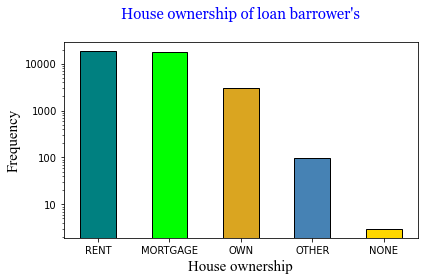

In [51]:
plt.bar(x_axis, y_axis, width=0.5, align="center", edgecolor="black", log=True, color=colors)
plt.title("House ownership of loan barrower's\n", fontdict=font_settings_title, **t_font )
plt.xlabel("House ownership", fontdict=font_settings_axis, **a_font)
plt.ylabel("Frequency", fontdict=font_settings_axis, **a_font)
plt.yticks(ticks, labels)
plt.tight_layout()
plt.show()

<h3 style = "color : darkblue"> verification_status </h3>

In [52]:
df["verification_status"].value_counts(ascending=False)

Verified        22796
Not Verified    16921
Name: verification_status, dtype: int64

In [53]:
slices = df["verification_status"].value_counts(ascending=False)
colors_pie = ["#e5ae37", "#6d904f"]
labels = df["verification_status"].value_counts(ascending=False).keys()

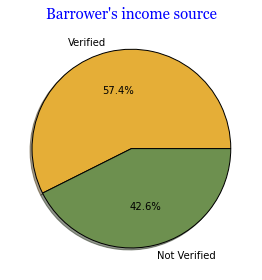

In [54]:
plt.pie(slices, wedgeprops={'edgecolor':'black'}, colors=colors_pie, labels=labels, autopct="%1.1f%%", shadow=True)
plt.title("Barrower's income source", fontdict=font_settings_title, **t_font)
plt.tight_layout()
plt.show()

<h3 style = "color : darkblue"> loan_status </h3>

In [55]:
df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [56]:
x_axis = df["loan_status"].value_counts().keys()

In [57]:
y_axis = df["loan_status"].value_counts().values

In [58]:
colors = ["#6d904f", "#fc4f30", "#e5ae37"]
ticks = [10,100,1000,10000, 100000]
labels = ticks

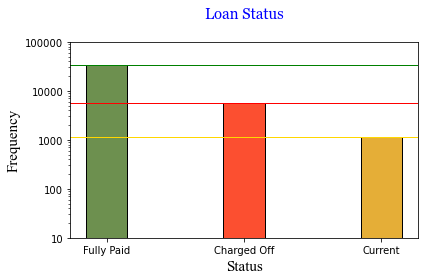

In [59]:
plt.bar(x_axis, y_axis, width=0.3, align="center", edgecolor="black", color=colors, log=True)
plt.title("Loan Status\n", fontdict=font_settings_title, **t_font)
plt.xlabel("Status", fontdict=font_settings_axis, **a_font)
plt.ylabel("Frequency", fontdict=font_settings_axis, **a_font)
plt.yticks(ticks, labels)
plt.axhline(y_axis[0], color="green", linewidth=1)
plt.axhline(y_axis[1], color="red", linewidth=1)
plt.axhline(y_axis[2], color="gold", linewidth=1)
plt.tight_layout()
plt.show()

<h3 style = "color : darkblue"> purpose </h3>

In [60]:
df["purpose"].value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

In [61]:
x_axis = df["purpose"].value_counts().keys()
y_axis = df["purpose"].value_counts().values
ticks = [10,100,1000,10000, 100000]
labels = ["10", "100", "1K", "10K", "100K"]

In [62]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

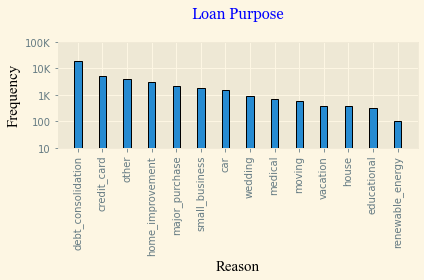

In [63]:
plt.style.use("Solarize_Light2")
plt.bar(x_axis, y_axis, width=0.3, align="center", edgecolor="black", log=True)
plt.title("Loan Purpose\n", fontdict=font_settings_title, **t_font)
plt.xlabel("Reason", fontdict=font_settings_axis, **a_font)
plt.ylabel("Frequency", fontdict=font_settings_axis, **a_font)
plt.xticks(rotation=90)
plt.yticks(ticks, labels)
plt.tight_layout()
plt.show()

In [64]:
dict_loan = {    
"rank" : np.arange(1, len(x_axis)+1),
"reason" : x_axis,
"freq" : y_axis
 }

In [65]:
df_loan = pd.DataFrame(dict_loan)

In [66]:
df_loan

,rank,reason,freq
0,1,debt_consolidation,18641
1,2,credit_card,5130
2,3,other,3993
3,4,home_improvement,2976
4,5,major_purchase,2187
5,6,small_business,1828
6,7,car,1549
7,8,wedding,947
8,9,medical,693
9,10,moving,583


In [67]:
yticks = [10, 100, 1000, 10000, 100000]
ylabels = ["10", "100", "1K", "10K", "100K"]
xticks = [10, 100]
xlabels = ["10", "100"]

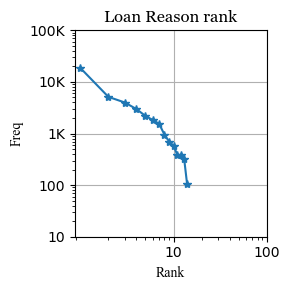

In [68]:
plt.style.use("default")
plt.figure(figsize=(3,3))
plt.plot(df_loan["rank"], df_loan["freq"], marker="*")
plt.title("Loan Reason rank", **t_font)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Rank", **a_font)
plt.ylabel("Freq", **a_font)
plt.xticks(xticks,xlabels)
plt.yticks(yticks,ylabels)
plt.grid(True)
plt.tight_layout()
plt.show()

<h2> <span style="font-family:Times New Roman"> <span style="color:Brown"> ORDERED CATEGORICAL VARIABLES </span> </span> </h2>

<h3 style = "color : darkblue"> grades </h3>

In [69]:
df["grade"].value_counts()

B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64

In [70]:
x_axis = df["grade"].value_counts().keys()
y_axis = df["grade"].value_counts().values
ticks = [10,100,1000,10000,100000]
labels = ["10","100","1K","10K","100K"]

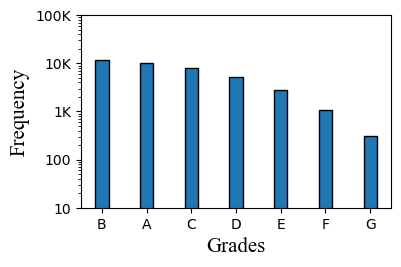

In [71]:
plt.style.use("default")
plt.figure(figsize=(4,2.5))
plt.bar(x_axis, y_axis, width=0.3, align="center", edgecolor="black", log=True)
#plt.title("Grades Plot\n", fontdict=font_settings_title, **t_font)
plt.xlabel("Grades", fontdict=font_settings_axis, **a_font)
plt.ylabel("Frequency", fontdict=font_settings_axis, **a_font)
plt.yticks(ticks, labels)
plt.show()

<h3 style = "color : darkblue"> term </h3>

In [72]:
df["term"].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [73]:
slices = df["term"].value_counts(ascending=False)
colors_pie = ["navy", "lime"]
labels = df["term"].value_counts(ascending=False).keys()

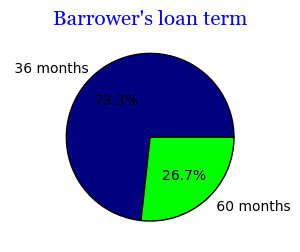

In [74]:
plt.style.use("default")
plt.figure(figsize=(3,3))
plt.pie(slices, wedgeprops={'edgecolor':'black'}, colors=colors_pie, labels=labels, autopct="%1.1f%%")
plt.title("Barrower's loan term", fontdict=font_settings_title, **t_font)
plt.tight_layout()
plt.show()

<h3 style = "color : darkblue"> sub_grade </h3>

In [75]:
x_axis = df["sub_grade"].value_counts().keys()
y_axis = df["sub_grade"].value_counts().values
len(df["sub_grade"].value_counts())

35

In [76]:
dict_sub_grade = {
    "rank": np.arange(1, len(x_axis)+1),
    "sub_grades" : x_axis,
    "freq" : y_axis
}

In [77]:
df_sub_grade = pd.DataFrame(dict_sub_grade)

In [78]:
yticks = [10, 100, 1000, 10000, 100000]
ylabels = ["10", "100", "1K", "10K", "100K"]
xticks = [10, 100]
xlabels = ["10", "100"]

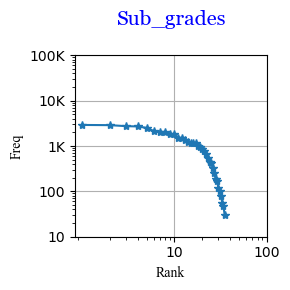

In [79]:
plt.style.use("default")
plt.figure(figsize=(3,3))
plt.plot(df_sub_grade["rank"], df_sub_grade["freq"], marker="*")
plt.title("Sub_grades\n", fontdict=font_settings_title, **t_font)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Rank", **a_font)
plt.ylabel("Freq", **a_font)
plt.xticks(xticks,xlabels)
plt.yticks(yticks,ylabels)
plt.grid(True)
plt.tight_layout()
plt.show()

<h3 style = "color : darkblue"> emp_length </h3>

In [80]:
df["emp_length"].value_counts()

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
0     1075
Name: emp_length, dtype: int64

In [81]:
x_axis = df["emp_length"].value_counts().keys()
y_axis = df["emp_length"].value_counts().values
ticks = np.arange(0,11)
labels = [f"{i}-years" for i in ticks]

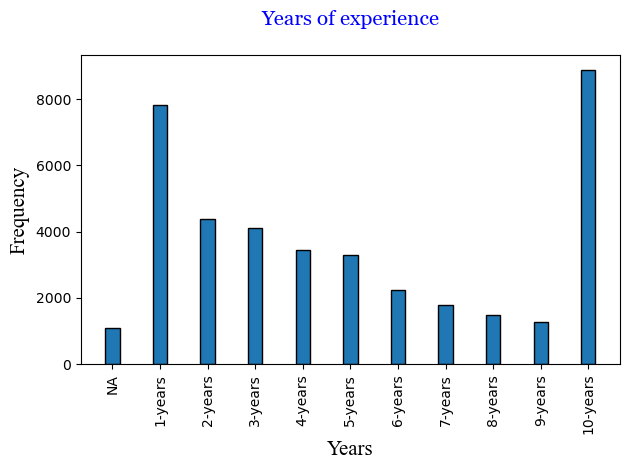

In [82]:
plt.style.use("default")
plt.bar(x_axis, y_axis, width=0.3, align="center", edgecolor="black")
plt.title("Years of experience\n", fontdict=font_settings_title, **t_font)
plt.xlabel("Years", fontdict=font_settings_axis, **a_font)
plt.ylabel("Frequency", fontdict=font_settings_axis, **a_font)
labels[0] = "NA"
plt.xticks(ticks, labels, rotation=90)
plt.tight_layout()
plt.show()

<h2> <span style="font-family:Times New Roman"> <span style="color:Brown"> QUANTITATIVE VARIABLES </span> </span> </h2>

<h3 style = "color : darkblue"> loan_amnt </h3>

In [83]:
df["loan_amnt"].head()

0     5000
1     2500
2     2400
3    10000
4     3000
Name: loan_amnt, dtype: int64

In [84]:
df["loan_amnt"].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

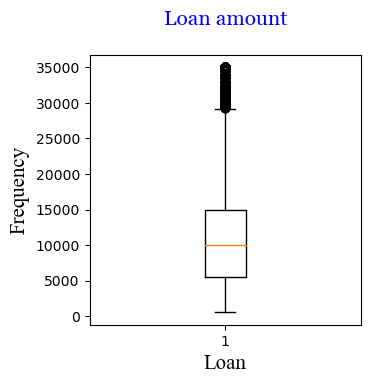

In [85]:
plt.figure(figsize=(3.5,3.5))
plt.boxplot(df["loan_amnt"])
plt.title("Loan amount\n", fontdict=font_settings_title, **t_font)
plt.xlabel("Loan", fontdict=font_settings_axis, **a_font)
plt.ylabel("Frequency", fontdict=font_settings_axis, **a_font)
plt.show()

In [86]:
bins = np.arange(0,40000,5000)

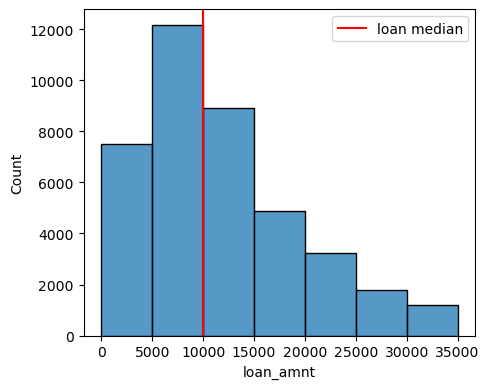

In [87]:
plt.figure(figsize=(5,4))
sns.histplot(df["loan_amnt"], bins=bins)
plt.axvline(df["loan_amnt"].median(), color="red", label="loan median", linewidth=1.5)
plt.legend()
plt.tight_layout()
plt.show()

<h3 style = "color : darkblue"> int_rate </h3>

In [88]:
df["int_rate"].describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

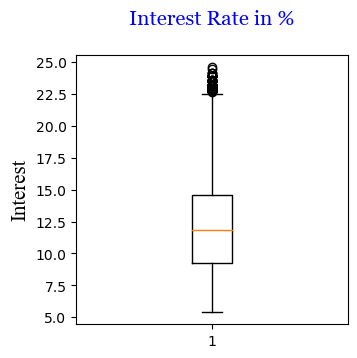

In [89]:
plt.figure(figsize=(3.5,3.5))
plt.boxplot(df["int_rate"])
plt.title("Interest Rate in %\n", fontdict=font_settings_title, **t_font)
plt.ylabel("Interest", fontdict=font_settings_axis, **a_font)
plt.show()

In [90]:
bins = np.arange(0,30,5)

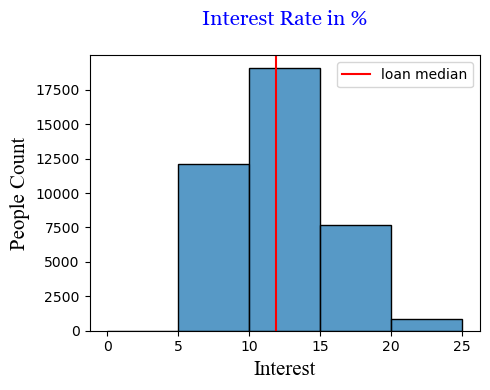

In [91]:
plt.figure(figsize=(5,4))
sns.histplot(df["int_rate"], bins=bins)
plt.title("Interest Rate in %\n", fontdict=font_settings_title, **t_font)
plt.xlabel("Interest", fontdict=font_settings_axis, **a_font)
plt.ylabel("People Count", fontdict=font_settings_axis, **a_font)
plt.axvline(df["int_rate"].median(), color="red", label="loan median", linewidth=1.5)
plt.legend()
plt.tight_layout()
plt.show()

<h3 style = "color : darkblue"> annual_inc </h3>

In [92]:
df["annual_inc"].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [93]:
pd.set_option("display.max_rows", 10)
std = 6.379377e+04

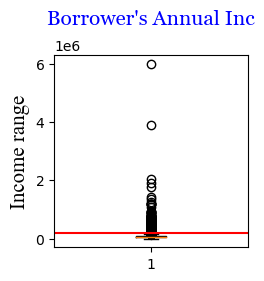

In [94]:
plt.figure(figsize=(2.5,2.5))
plt.boxplot(df["annual_inc"])
plt.title("Borrower's Annual Inc\n", fontdict=font_settings_title, **t_font)
plt.ylabel("Income range", fontdict=font_settings_axis, **a_font)
plt.axhline(std*3, color="red")
plt.show()

### Plotting in log scale

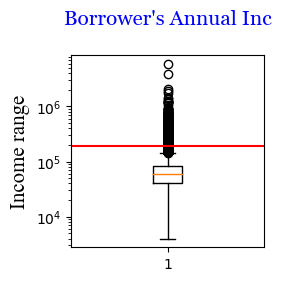

In [95]:
plt.figure(figsize=(2.5,2.5))
plt.boxplot(df["annual_inc"])
plt.title("Borrower's Annual Inc\n", fontdict=font_settings_title, **t_font)
plt.ylabel("Income range", fontdict=font_settings_axis, **a_font)
plt.yscale("log")
plt.axhline(std*3, color="red")
plt.show()

### Removing the outliers

- `The employee who is having less than 8 years of experience but getting salary more that 3-Std`
- `The employee who is getting salary more than 10L`

In [96]:
df.shape

(39717, 39)

In [97]:
df = df[~((df["annual_inc"] > std*3) & (df["emp_length"] < 8) & (df["emp_length"] != 0) )]
df = df[~(df["annual_inc"] > 1000000)]

In [98]:
df.shape

(39273, 39)

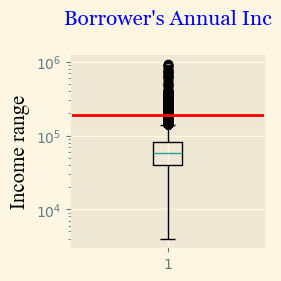

In [99]:
plt.style.use("Solarize_Light2")
plt.figure(figsize=(2.5,2.5))
plt.boxplot(df["annual_inc"])
plt.title("Borrower's Annual Inc\n", fontdict=font_settings_title, **t_font)
plt.ylabel("Income range", fontdict=font_settings_axis, **a_font)
plt.yscale("log")
plt.axhline(std*3, color="red")
plt.show()

In [100]:
bins = np.arange(0,110000, 10000)

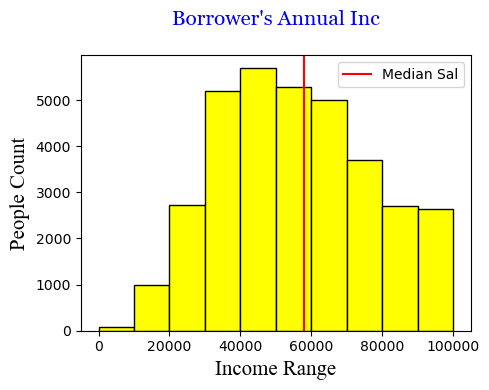

In [101]:
plt.style.use("default")
plt.figure(figsize=(5,4))
plt.hist(df["annual_inc"], edgecolor="black", bins=bins, color="yellow")
plt.title("Borrower's Annual Inc\n", fontdict=font_settings_title, **t_font)
plt.xlabel("Income Range", fontdict=font_settings_axis, **a_font)
plt.ylabel("People Count", fontdict=font_settings_axis, **a_font)
plt.axvline(df["annual_inc"].median(), color="red", label="Median Sal", linewidth=1.5)
plt.legend()
plt.tight_layout()
plt.show()

<h3 style = "color : darkblue"> delinq_2yrs </h3>

In [102]:
df["delinq_2yrs"].describe()

count    39273.000000
mean         0.146207
std          0.491589
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [103]:
bins = np.arange(0,12)

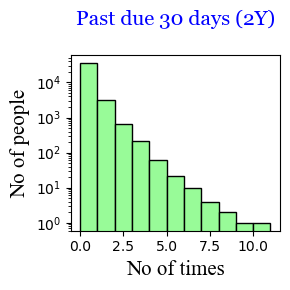

In [104]:
plt.style.use("default")
plt.figure(figsize=(3,3))
plt.hist(df["delinq_2yrs"], bins=bins, edgecolor="black", color="palegreen")
plt.yscale("log")
plt.title("Past due 30 days (2Y)\n", fontdict=font_settings_title, **t_font)
plt.xlabel("No of times", fontdict=font_settings_axis, **a_font)
plt.ylabel("No of people", fontdict=font_settings_axis, **a_font)
plt.tight_layout()
plt.show()

<h1> <span style="font-family:Times New Roman"> <span style="color:Green"> SEGMENTED UNIVARIATE ANALYSIS </span> </span> </h1>

<h3 style = "color : darkblue"> loan_amnt vs loan_status </h3>

In [105]:
df_grp_loan_status = df.groupby("loan_status")

In [106]:
df_grp_loan_status.describe()["loan_amnt"]

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5586.0,12049.440566,8050.242565,900.0,5600.0,10000.0,16150.0,35000.0
Current,1126.0,16983.703375,8620.093243,1000.0,12000.0,15575.0,22800.0,35000.0
Fully Paid,32561.0,10775.500599,7114.598677,500.0,5100.0,9500.0,15000.0,35000.0


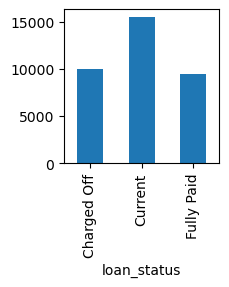

In [107]:
plt.figure(figsize=(2,2))
df_grp_loan_status.median()["loan_amnt"].plot.bar()
plt.show()

In [108]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

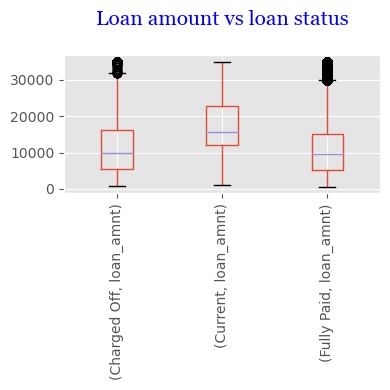

In [109]:
plt.style.use("ggplot")
plt.figure(figsize=(4,4))
df_grp_loan_status.boxplot(subplots = False, column = "loan_amnt", rot=90)
plt.title("Loan amount vs loan status\n", fontdict=font_settings_title, **t_font)
plt.tight_layout()
plt.show()

<h3 style = "color : darkblue"> purpose vs loan_status </h3>

In [110]:
def charged_off(loan_status):
    if loan_status == "Charged Off":
        return 1
    else:
        return 0
    
def fully_paid(loan_status):
    if loan_status == "Fully Paid":
        return 1
    else:
        return 0
    
def current(loan_status):
    if loan_status == "Current":
        return 1
    else:
        return 0

In [111]:
pd.set_option("display.max_rows", 10)

df["charged_off"] = df["loan_status"].apply(charged_off)
df["fully_paid"] = df["loan_status"].apply(fully_paid)
df["current"] = df["loan_status"].apply(current)



In [112]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issued_month,issued_year,charged_off,fully_paid,current
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,...,0.00,Jan-15,171.62,May-16,0.0,Dec,11,0,1,0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,...,1.11,Apr-13,119.66,Sep-13,0.0,Dec,11,1,0,0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,...,0.00,Jun-14,649.91,May-16,0.0,Dec,11,0,1,0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,...,0.00,Jan-15,357.48,Apr-16,0.0,Dec,11,0,1,0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,RENT,...,0.00,May-16,67.79,May-16,0.0,Dec,11,0,0,1


In [113]:
pd.set_option("display.max_rows", 20)
df_grp_purpose = df.groupby("purpose")

In [114]:
df_grp_purpose.sum()[["charged_off", "fully_paid", "current"]]

,charged_off,fully_paid,current
purpose,,,
car,160,1329,50
credit_card,538,4438,103
debt_consolidation,2753,15154,581
educational,55,268,0
home_improvement,341,2465,97
house,59,300,14
major_purchase,219,1901,37
medical,106,559,10
moving,92,479,7


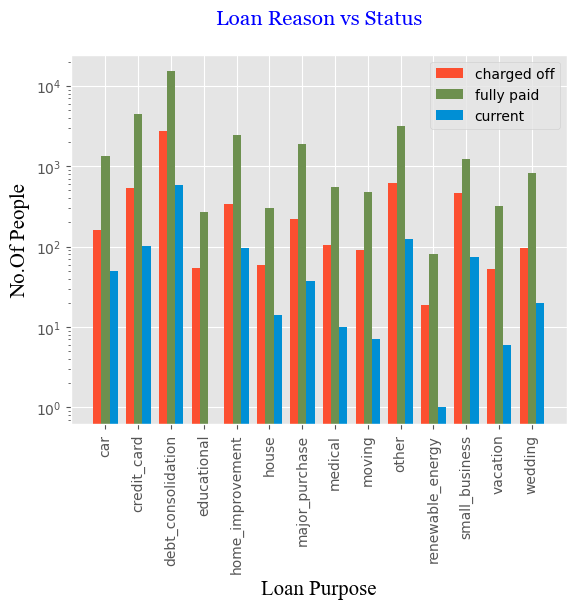

In [115]:
x_labels = df_grp_purpose.sum()["charged_off"].index

x_axis = np.arange( len(df_grp_purpose.sum()["charged_off"]) )

y_charged_off = df_grp_purpose.sum()["charged_off"]
y_fully_paid = df_grp_purpose.sum()["fully_paid"]
y_current = df_grp_purpose.sum()["current"]

width = 0.25

plt.bar(x_axis-width, y_charged_off, width=width, color="#fc4f30", label="charged off")
plt.bar(x_axis, y_fully_paid, width=width, color="#6d904f", label="fully paid")
plt.bar(x_axis+width, y_current, width=width, color="#008fd5", label="current")

plt.title("Loan Reason vs Status\n", fontdict=font_settings_title, **t_font)
plt.xlabel("Loan Purpose", fontdict=font_settings_axis, **a_font)
plt.ylabel("No.Of People", fontdict=font_settings_axis, **a_font)

plt.yscale("log")
plt.xticks(x_axis, x_labels, rotation=90)
plt.legend()
plt.show()

<h3 style = "color : darkblue"> int_rate vs loan_status </h3>

In [116]:
df["int_rate"].describe()

count    39273.000000
mean        12.006584
std          3.717389
min          5.420000
25%          9.250000
50%         11.830000
75%         14.540000
max         24.400000
Name: int_rate, dtype: float64

In [117]:
?pd.qcut

In [118]:
df["int_rate_b"] = pd.qcut(df["int_rate"], [0, 0.25, 0.5, 0.75, 1], ["very low", "low", "medium", "high"])

In [119]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issued_month,issued_year,charged_off,fully_paid,current,int_rate_b
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,...,Jan-15,171.62,May-16,0.0,Dec,11,0,1,0,low
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,...,Apr-13,119.66,Sep-13,0.0,Dec,11,1,0,0,high
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,...,Jun-14,649.91,May-16,0.0,Dec,11,0,1,0,high
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,...,Jan-15,357.48,Apr-16,0.0,Dec,11,0,1,0,medium
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,RENT,...,May-16,67.79,May-16,0.0,Dec,11,0,0,1,medium


In [120]:
df_grp_int = df.groupby("int_rate_b")

In [121]:
df_grp_int.sum()["charged_off"]

int_rate_b
very low     596
low         1132
medium      1549
high        2309
Name: charged_off, dtype: int64

In [122]:
df_grp_int.sum()["current"]

int_rate_b
very low     42
low         215
medium      302
high        567
Name: current, dtype: int64

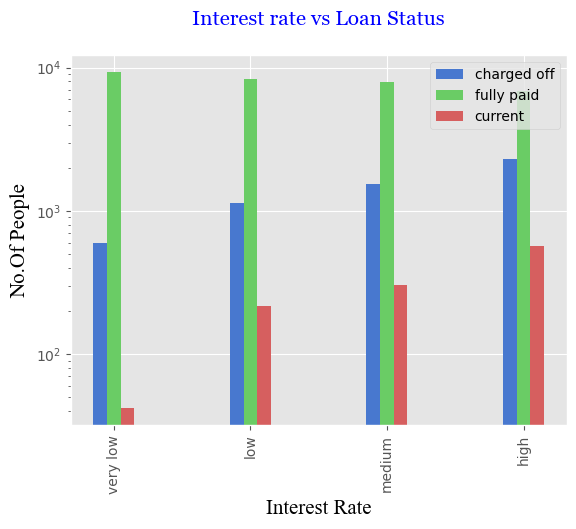

In [123]:
plt.style.use("seaborn-muted")
x_labels = df_grp_int.sum()["charged_off"].index

x_axis = np.arange( len(df_grp_int.sum()["charged_off"]) )

y_charged_off = df_grp_int.sum()["charged_off"]
y_fully_paid = df_grp_int.sum()["fully_paid"]
y_current = df_grp_int.sum()["current"]

width = 0.10

plt.bar(x_axis-width, y_charged_off, width=width,  label="charged off")
plt.bar(x_axis, y_fully_paid, width=width,  label="fully paid")
plt.bar(x_axis+width, y_current, width=width,  label="current")

plt.title("Interest rate vs Loan Status\n", fontdict=font_settings_title, **t_font)
plt.xlabel("Interest Rate", fontdict=font_settings_axis, **a_font)
plt.ylabel("No.Of People", fontdict=font_settings_axis, **a_font)

plt.yscale("log")
plt.xticks(x_axis, x_labels, rotation=90)
plt.legend()
plt.show()

<h3 style = "color : darkblue"> Home Ownership vs loan_status </h3>

In [124]:
df_grp_home = df.groupby("home_ownership")

In [125]:
df_grp_home.sum()[["charged_off", "current", "fully_paid"]]

,charged_off,current,fully_paid
home_ownership,,,
MORTGAGE,2302,628,14418
NONE,0,0,3
OTHER,18,0,78
OWN,442,83,2520
RENT,2824,415,15542


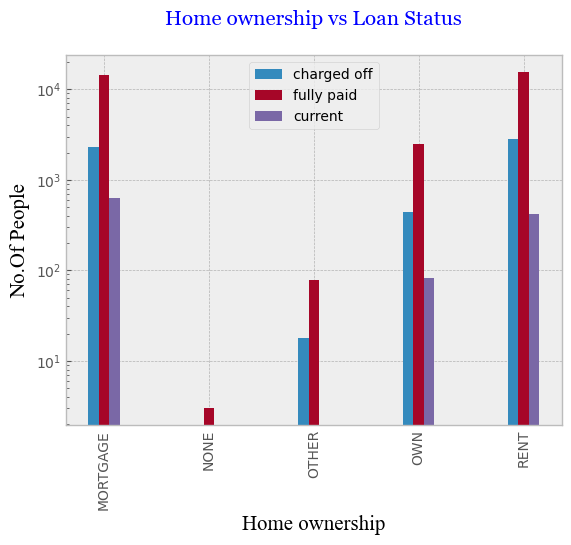

In [126]:
plt.style.use("bmh")
x_labels = df_grp_home.sum()["charged_off"].index

x_axis = np.arange( len(df_grp_home.sum()["charged_off"]) )

y_charged_off = df_grp_home.sum()["charged_off"]
y_fully_paid = df_grp_home.sum()["fully_paid"]
y_current = df_grp_home.sum()["current"]

width = 0.10

plt.bar(x_axis-width, y_charged_off, width=width, label="charged off")
plt.bar(x_axis, y_fully_paid, width=width, label="fully paid")
plt.bar(x_axis+width, y_current, width=width, label="current")

plt.title("Home ownership vs Loan Status\n", fontdict=font_settings_title, **t_font)
plt.xlabel("Home ownership", fontdict=font_settings_axis, **a_font)
plt.ylabel("No.Of People", fontdict=font_settings_axis, **a_font)

plt.yscale("log")
plt.xticks(x_axis, x_labels, rotation=90)
plt.legend()
plt.show()

<h1> <span style="font-family:Times New Roman"> <span style="color:Green"> BIVARIATE ANALYSIS </span> </span> </h1>

<h3 style = "color : darkblue"> corr btwn impo columns </h3>

In [127]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies', 'issued_month',
       'issued_year', 'charged_off', 'fully_paid', 'current', 'int_rate_b'],
      dtype='object')

In [128]:
corr_columns = df.loc[:,['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'emp_length', 'annual_inc']].corr()

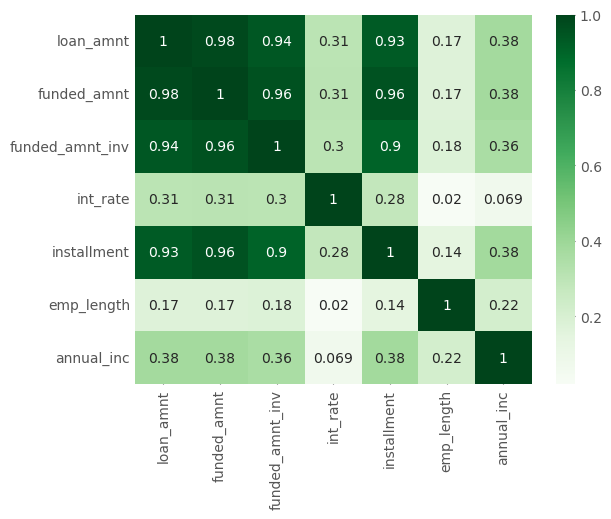

In [129]:
sns.heatmap(corr_columns, annot=True, cmap="Greens")
plt.show()

<h3 style = "color : darkblue"> loan_status vs annual_inc </h3>

In [130]:
df["annual_inc_b"] = pd.qcut(df["annual_inc"], [0, 0.2, 0.4, 0.6, 0.8, 1], ["very low", "low", "medium", "high", "very high"])

In [131]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issued_month,issued_year,charged_off,fully_paid,current,int_rate_b,annual_inc_b
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,...,171.62,May-16,0.0,Dec,11,0,1,0,low,very low
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,...,119.66,Sep-13,0.0,Dec,11,1,0,0,high,very low
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,...,649.91,May-16,0.0,Dec,11,0,1,0,high,very low
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,...,357.48,Apr-16,0.0,Dec,11,0,1,0,medium,low
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,RENT,...,67.79,May-16,0.0,Dec,11,0,0,1,medium,high


In [132]:
df_grp_inc_loan_status = df.groupby(by=["annual_inc_b", "loan_status"])

In [133]:
inc_loan_table = df_grp_inc_loan_status.loan_status.count().unstack()

In [134]:
inc_loan_table

loan_status,Charged Off,Current,Fully Paid
annual_inc_b,,,
very low,1418,136,6333
low,1195,219,6443
medium,1156,234,6544
high,1040,281,6963
very high,777,256,6278


In [135]:
inc_loan_table["total"] = inc_loan_table["Charged Off"] + inc_loan_table["Current"] + inc_loan_table["Fully Paid"]

In [136]:
inc_loan_table["charged_off_ratio"] = inc_loan_table["Charged Off"] / inc_loan_table["total"]
inc_loan_table["current_ratio"] = inc_loan_table["Current"] / inc_loan_table["total"]
inc_loan_table["fully_paid_ratio"] = inc_loan_table["Fully Paid"] / inc_loan_table["total"]

In [137]:
inc_loan_table

loan_status,Charged Off,Current,Fully Paid,total,charged_off_ratio,current_ratio,fully_paid_ratio
annual_inc_b,,,,,,,
very low,1418,136,6333,7887,0.179790,0.017244,0.802967
low,1195,219,6443,7857,0.152094,0.027873,0.820033
medium,1156,234,6544,7934,0.145702,0.029493,0.824805
high,1040,281,6963,8284,0.125543,0.033921,0.840536
very high,777,256,6278,7311,0.106278,0.035016,0.858706


In [138]:
x_labels = ["very low", "low", "medium", "high", "very high"]
x_axis = np.arange(0,5)

y_charged_off = inc_loan_table["charged_off_ratio"]
y_fully_paid = inc_loan_table["fully_paid_ratio"]
y_current = inc_loan_table["current_ratio"]

In [139]:
width = 0.10

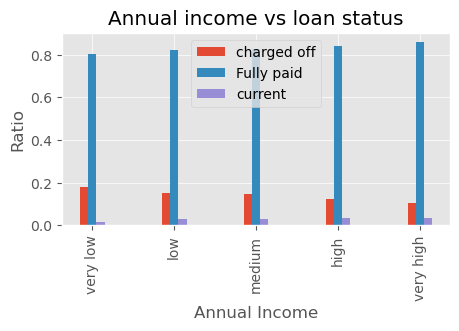

In [140]:
plt.style.use("ggplot")
plt.figure(figsize=(5,2.5))
plt.bar(x_axis-width, y_charged_off, width=width, label="charged off")
plt.bar(x_axis, y_fully_paid, width=width, label="Fully paid")
plt.bar(x_axis+width, y_current, width=width, label="current")

plt.title("Annual income vs loan status")
plt.xlabel("Annual Income")
plt.ylabel("Ratio")
plt.xticks(x_axis, x_labels, rotation=90)
plt.legend()
plt.show()

<h3 style = "color : darkblue"> grades vs loan_status </h3>

In [141]:
df_grp_grade_loan_status = df.groupby(by=["grade", "loan_status"])

In [142]:
grade_loan_table = df_grp_grade_loan_status.loan_status.count().unstack()

In [143]:
grade_loan_table

loan_status,Charged Off,Current,Fully Paid
grade,,,
A,601,40,9367
B,1416,342,10143
C,1339,262,6400
D,1113,219,3915
E,706,178,1909
F,312,69,635
G,99,16,192


In [144]:
grade_loan_table["total"] = grade_loan_table["Charged Off"] + grade_loan_table["Current"] + grade_loan_table["Fully Paid"]

In [145]:
grade_loan_table["charged_off_ratio"] = grade_loan_table["Charged Off"] / grade_loan_table["total"]
grade_loan_table["current_ratio"] = grade_loan_table["Current"] / grade_loan_table["total"]
grade_loan_table["fully_paid_ratio"] = grade_loan_table["Fully Paid"] / grade_loan_table["total"]

In [146]:
grade_loan_table

loan_status,Charged Off,Current,Fully Paid,total,charged_off_ratio,current_ratio,fully_paid_ratio
grade,,,,,,,
A,601,40,9367,10008,0.060052,0.003997,0.935951
B,1416,342,10143,11901,0.118982,0.028737,0.852281
C,1339,262,6400,8001,0.167354,0.032746,0.799900
D,1113,219,3915,5247,0.212121,0.041738,0.746141
E,706,178,1909,2793,0.252775,0.063731,0.683494
F,312,69,635,1016,0.307087,0.067913,0.625000
G,99,16,192,307,0.322476,0.052117,0.625407


In [147]:
x_labels = ["A", "B", "C", "D", "E", "F", "G"]
x_axis = np.arange(0,7)

y_charged_off = grade_loan_table["charged_off_ratio"]
y_fully_paid = grade_loan_table["fully_paid_ratio"]
y_current = grade_loan_table["current_ratio"]

width=0.10

In [148]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

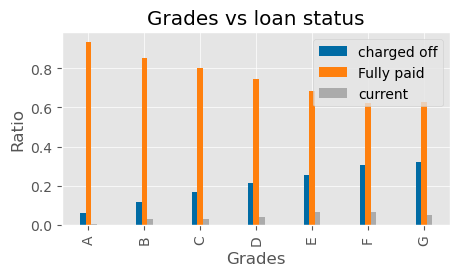

In [149]:
plt.style.use("tableau-colorblind10")
plt.figure(figsize=(5,2.5))
plt.bar(x_axis-width, y_charged_off, width=width, label="charged off")
plt.bar(x_axis, y_fully_paid, width=width, label="Fully paid")
plt.bar(x_axis+width, y_current, width=width, label="current")

plt.title("Grades vs loan status")
plt.xlabel("Grades")
plt.ylabel("Ratio")
plt.xticks(x_axis, x_labels, rotation=90)
plt.legend()
plt.show()

<h3 style = "color : darkblue"> grades vs interest rates </h3>

In [150]:
?sns.boxplot

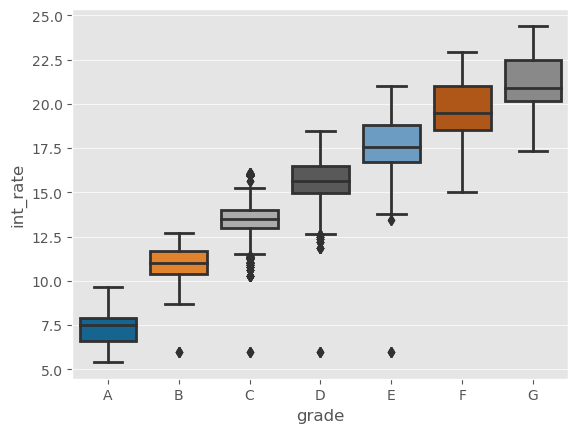

In [151]:
sns.boxplot(x=df['grade'], y=df['int_rate'], order="ABCDEFG")
plt.show()